In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn import metrics
%matplotlib inline

In [105]:
df = pd.read_csv('IBM HR Employee Attrition.csv')


In [106]:
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})
df['BusinessTravel'] = df['BusinessTravel'].map({'Travel_Rarely': 0, 'Travel_Frequently': 1, 'Non-Travel': 2})
df['Department'] = df['Department'].map({'Sales': 0, 'Research & Development': 1, 'Human Resources': 2})
df['Gender'] = df['Gender'].map({'Female': 0, 'Male': 1})

df['EducationField'] = df['EducationField'].map({
    'Life Sciences': 0, 
    'Other': 1, 
    'Medical': 2,
    'Marketing': 3, 
    'Technical Degree': 4, 
    'Human Resources': 5
})

df['JobRole'] = df['JobRole'].map({
    'Sales Executive': 0, 
    'Research Scientist': 1, 
    'Laboratory Technician': 2,
    'Manufacturing Director': 3, 
    'Healthcare Representative': 4, 
    'Manager': 5,
    'Sales Representative': 6, 
    'Research Director': 7, 
    'Human Resources': 8
})

df['MaritalStatus'] = df['MaritalStatus'].map({
    'Single': 0, 
    'Married': 1, 
    'Divorced': 2
})

df = df.drop('Over18', axis=1)

df['OverTime'] = df['OverTime'].map({'No': 0, 'Yes': 1})


Dropping colum that are not found to be useful

In [107]:
df.drop(columns=['StockOptionLevel', 'YearsAtCompany',
       'JobInvolvement', 'JobSatisfaction', 'EnvironmentSatisfaction',
       'DistanceFromHome', 'EducationField', 'Department', 'WorkLifeBalance',
       'TrainingTimesLastYear', 'DailyRate', 'RelationshipSatisfaction',
       'NumCompaniesWorked', 'YearsSinceLastPromotion', 'Education', 'Gender',
       'JobRole', 'MonthlyRate', 'PercentSalaryHike', 'EmployeeNumber',
       'HourlyRate', 'PerformanceRating', 'BusinessTravel', 'EmployeeCount',
       'StandardHours'], inplace=True)


In [108]:
df["Attrition"] = df.pop("Attrition")
df

,Age,JobLevel,MaritalStatus,MonthlyIncome,OverTime,TotalWorkingYears,YearsInCurrentRole,YearsWithCurrManager,Attrition
0,41,2,0,5993,1,8,4,5,1
1,49,2,1,5130,0,10,7,7,0
2,37,1,0,2090,1,7,0,0,1
3,33,1,1,2909,1,8,7,0,0
4,27,1,1,3468,0,6,2,2,0
...,...,...,...,...,...,...,...,...,...
1465,36,2,1,2571,0,17,2,3,0
1466,39,3,1,9991,0,9,7,7,0
1467,27,2,1,6142,1,6,2,3,0
1468,49,2,1,5390,0,17,6,8,0


In [109]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values


In [110]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(x)
sc.transform(x)
x

array([[41,  2,  0, ...,  8,  4,  5],
       [49,  2,  1, ..., 10,  7,  7],
       [37,  1,  0, ...,  7,  0,  0],
       ...,
       [27,  2,  1, ...,  6,  2,  3],
       [49,  2,  1, ..., 17,  6,  8],
       [34,  2,  1, ...,  6,  3,  2]], dtype=int64)

Spliting dataset into Two parts.traning and testing

In [111]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =train_test_split(x,y, test_size=0.25, random_state=0)


finding best paramnetrs for random forest using gridSearch


In [112]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import GridSearchCV
# #find ideal paramters for randomforest
# param_grid = {
#     'n_estimators': [10, 50, 100, 200],
#     'max_depth': [None, 5, 10, 20],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 5],
#     'max_features': ['auto', 'sqrt', 'log2'],
#     'bootstrap': [True, False]
# }

# RF = RandomForestClassifier(random_state=0)
# grid = GridSearchCV(RF, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
# grid.fit(x_train,y_train)
# print(grid.best_params_)
# print(grid.best_score_)





In [113]:
#train model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200, max_depth=20, min_samples_split=2, min_samples_leaf=2, max_features='sqrt', bootstrap=True, random_state=0)
rf.fit(x_train, y_train)
y_pred=rf.predict(x_test)

In [114]:

cm=confusion_matrix(y_test, y_pred)
cm

array([[302,   8],
       [ 43,  15]], dtype=int64)

plotting a heatmap for confusion matrix

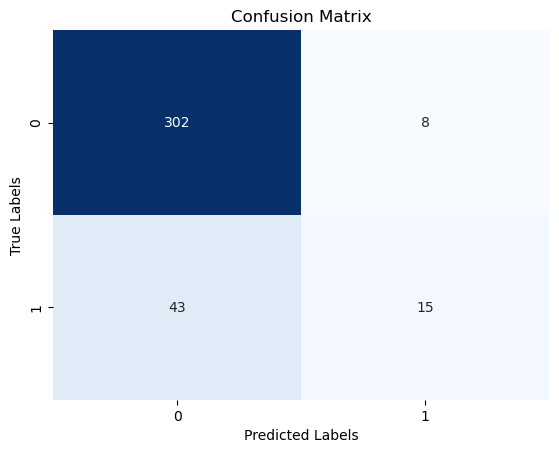

In [115]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

plt.show()


In [116]:
from sklearn.metrics import accuracy_score
ac=accuracy_score(y_test, y_pred)
('Random forest algorithim accuracy scorew is:',ac*100)

('Random forest algorithim accuracy scorew is:', 86.1413043478261)

precison ,recall and F-1 score for random forest

In [117]:
print (metrics.confusion_matrix(y_test, y_pred))
print (metrics.classification_report(y_test, y_pred))

[[302   8]
 [ 43  15]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       310
           1       0.65      0.26      0.37        58

    accuracy                           0.86       368
   macro avg       0.76      0.62      0.65       368
weighted avg       0.84      0.86      0.84       368



Training model with k nearest neighbour and findingg best k value

In [118]:
from sklearn.neighbors import KNeighborsClassifier

k_range = range(1,10)
cm_score = []
for k in k_range:

    knn = KNeighborsClassifier(n_neighbors=k)
    myModel = knn.fit(x_train, y_train)
    y_pred = myModel.predict(x_test)
    cm = confusion_matrix(y_test, y_pred)
    cm_score.append( knn.score(x_test,y_test))
cm_score


[0.7391304347826086,
 0.8206521739130435,
 0.782608695652174,
 0.8152173913043478,
 0.8179347826086957,
 0.8342391304347826,
 0.8315217391304348,
 0.845108695652174,
 0.8369565217391305]

plotting a graph to have visulize which value for K returns the best result

C:\Users\krujo\AppData\Local\Temp\ipykernel_3864\3576915040.py:2: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries
  plt.legend('accuracy',"Data sets")


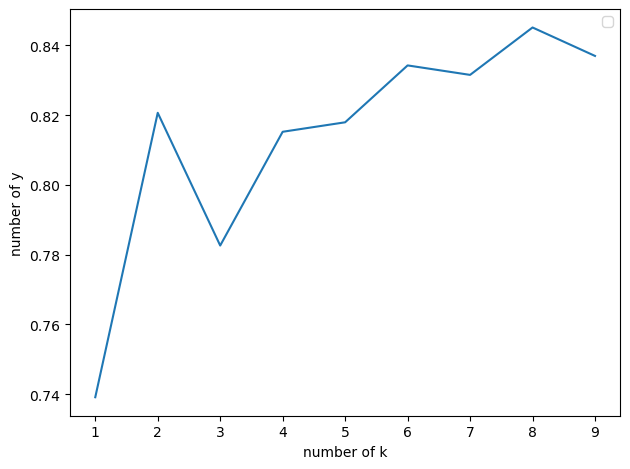

In [119]:
plt.plot(k_range, cm_score)
plt.legend('accuracy',"Data sets")
plt.xlabel('number of k')
plt.ylabel('number of y')
plt.tight_layout()
plt.show()

plotting a heatmap for confusion matrix

Text(0.5, 1.0, 'Confusion Matrix')

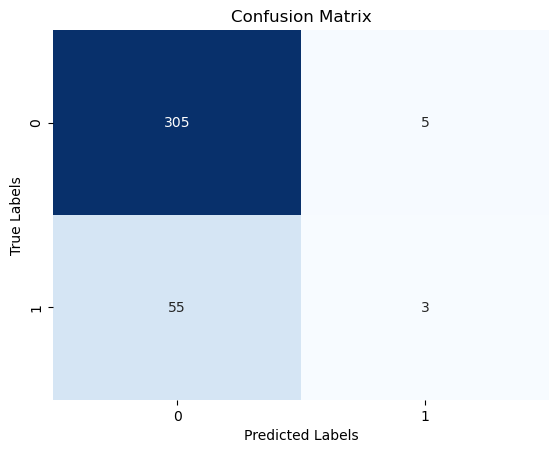

In [120]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

precison ,recall and F-1 score for k nearest neighbour

In [121]:
print (metrics.confusion_matrix(y_test, y_pred))
print (metrics.classification_report(y_test, y_pred))

[[305   5]
 [ 55   3]]
              precision    recall  f1-score   support

           0       0.85      0.98      0.91       310
           1       0.38      0.05      0.09        58

    accuracy                           0.84       368
   macro avg       0.61      0.52      0.50       368
weighted avg       0.77      0.84      0.78       368



Training model with support vector machine

In [122]:
from sklearn.svm import SVC
SVM = SVC(kernel = 'linear')
SVM.fit(x_train,y_train)

SVC(kernel='linear')

Confusin matrix useing heatmap

Text(0.5, 1.0, 'Confusion Matrix')

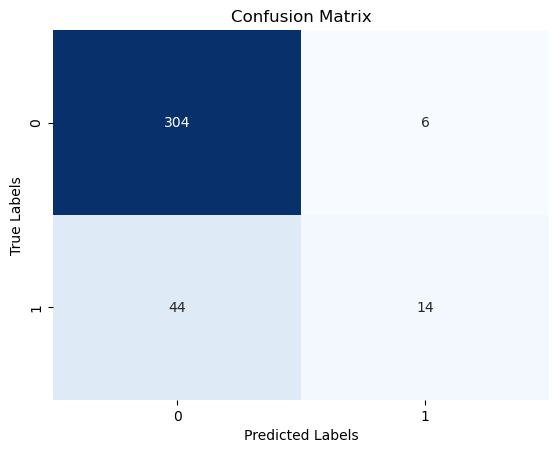

In [123]:
y_pred=SVM.predict(x_test)

cm=confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

precision,Recall and F-1 score

In [124]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(confusion_matrix(y_test, y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[304   6]
 [ 44  14]]
Mean Absolute Error: 0.1358695652173913
Mean Squared Error: 0.1358695652173913
Root Mean Squared Error: 0.3686048903872428
Accuracy: 0.8641304347826086
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       310
           1       0.70      0.24      0.36        58

    accuracy                           0.86       368
   macro avg       0.79      0.61      0.64       368
weighted avg       0.85      0.86      0.83       368

